In [196]:
import pandas as pd
import ujson
import json
pd.options.display.max_colwidth = 5000
import matplotlib

In [4]:
lib19 = pd.read_feather('../data/feather_files/RS_2019_liberal_df.feather')
con19 = pd.read_feather("../data/feather_files/RS_2019_conservative_df.feather")
pol19 = pd.read_feather('../data/feather_files/RS_2019_politics_df.feather')
can19 = pd.read_feather('../data/feather_files/RS_2019_canada_df.feather')

In [181]:
pol19_sub = pol19[(pol19.selftext.astype(str).str.len()>10)].reset_index()
can19_sub = can19[(can19.selftext.astype(str).str.len()>10)].reset_index()
lib19_sub = lib19[(lib19.selftext.astype(str).str.len()>10)].reset_index()
con19_sub = con19[(con19.selftext.astype(str).str.len()>10)].reset_index()

In [182]:
def concat_text(df):
    df['text'] = df.title + " " + df.selftext
    df.drop(columns=["title","selftext"],inplace=True)
    return df
pol19_sub = concat_text(pol19_sub)
con19_sub = concat_text(con19_sub)
lib19_sub = concat_text(lib19_sub)
can19_sub = concat_text(can19_sub)

In [86]:
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import random
#nltk.download('all')

In [168]:
def clean_text(text):
    """
    To be filled later
    """
    tokens = word_tokenize(text)
    lemma = WordNetLemmatizer()
    def clean(word):
        if not word.isalpha() or len(word) < 3:
            return False
        if word.lower() in stopwords.words("english"):
            return False
        return True
    tokens = " ".join(str(x) for x in \
        [lemma.lemmatize(\
            lemma.lemmatize(word.lower(),pos="v")\
            ,pos="n") for word in tokens if clean(word)]\
        )
    return tokens
#--------------------------------------------------

In [184]:
#tststr = can19_sub.selftext.sample().to_string()
#print(tststr)
#clean_text(tststr)
can19_sub.text = can19_sub.text.map(clean_text)
pol19_sub.text = pol19_sub.text.map(clean_text)
con19_sub.text = con19_sub.text.map(clean_text)
lib19_sub.text = lib19_sub.text.map(clean_text)

In [189]:
can19_sub.sample(1)

,index,author,created_utc,num_comments,score,domain,locked,subreddit,text
162,1021,isarealboy13,2019-01-21,28,7,self.canada,False,canada,buddy usa want visit halifax get duo three year ago advice read lot place may deny entry remember ever even ask passport show suggestion


'5750    I had my appt this morning and it was the quickest thing ever. The officer literally verified my information (address, place of employment) and sent me on my way. I wasn’t even asked why I was interested in a NEXUS, wasn’t asked where I travel or how often...and wasn’t explained at all how to use it. I was in and out in less than 5 minutes! I also made zero contact with a CBSA officer, only CBP. It was easy but kind of left me hanging at the same time. I should have asked questions I guess'

count     2147.000000
mean       150.029809
std        980.261269
min          0.000000
25%          0.000000
50%          5.000000
75%         20.000000
max      19879.000000
Name: score, dtype: float64

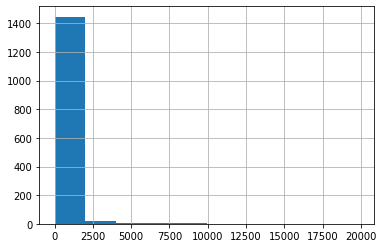

In [205]:
score = can19_sub.score
score[score!=0].hist()
score.describe()

NameError: name 'median' is not defined

In [215]:
import string

In [219]:

subreddit_list = ["twoxchromosomes","Showerthoughts"]

In [218]:
map(str.lower,subreddit_list)

['twoxchromosomes', 'showerthoughts']

In [ ]:
str("212")

In [ ]:
d={}
for x in range(1,10):
    d[x] = data
   # d[x].summary()
for t in d.values():
    print(t.columns)

In [ ]:
d["3"]

In [ ]:
data.extra=0

In [ ]:
data